## Loading the dataset and libraries 

In [63]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures


In [2]:
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/medical_insurance_dataset.csv'

In [4]:
df=pd.read_csv(path)
df.head(10)

,19,1,27.9,0,1.1,3,16884.924
0,18,2,33.770,1,0,4,1725.55230
1,28,2,33.000,3,0,4,4449.46200
2,33,2,22.705,0,0,1,21984.47061
3,32,2,28.880,0,0,1,3866.85520
4,31,1,25.740,0,?,4,3756.62160
5,46,1,33.440,1,0,4,8240.58960
6,37,1,27.740,3,0,1,7281.50560
7,37,2,29.830,2,0,2,6406.41070
8,60,1,25.840,0,0,1,28923.13692
9,25,2,26.220,0,0,2,2721.32080


In [6]:
df.columns=['age','gender','bmi','no_of_children','smoker','region','charges']
df

,age,gender,bmi,no_of_children,smoker,region,charges
0,18,2,33.770,1,0,4,1725.55230
1,28,2,33.000,3,0,4,4449.46200
2,33,2,22.705,0,0,1,21984.47061
3,32,2,28.880,0,0,1,3866.85520
4,31,1,25.740,0,?,4,3756.62160
...,...,...,...,...,...,...,...
2766,47,1,45.320,1,0,4,8569.86180
2767,21,1,34.600,0,0,3,2020.17700
2768,19,2,26.030,1,1,1,16450.89470
2769,23,2,18.715,0,0,1,21595.38229


## Cleaning the dataset by eliminating the null values , as to make it ready to analyze and draw some regression plots. 

In [8]:
df.replace('?',np.nan,inplace=True)
df

,age,gender,bmi,no_of_children,smoker,region,charges
0,18,2,33.770,1,0,4,1725.55230
1,28,2,33.000,3,0,4,4449.46200
2,33,2,22.705,0,0,1,21984.47061
3,32,2,28.880,0,0,1,3866.85520
4,31,1,25.740,0,NaN,4,3756.62160
...,...,...,...,...,...,...,...
2766,47,1,45.320,1,0,4,8569.86180
2767,21,1,34.600,0,0,3,2020.17700
2768,19,2,26.030,1,1,1,16450.89470
2769,23,2,18.715,0,0,1,21595.38229


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2767 non-null   object 
 1   gender          2771 non-null   int64  
 2   bmi             2771 non-null   float64
 3   no_of_children  2771 non-null   int64  
 4   smoker          2764 non-null   object 
 5   region          2771 non-null   int64  
 6   charges         2771 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB


In [23]:
most_freq=df['age'].value_counts().idxmax()
df['age'].replace(np.nan,most_freq,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2771 non-null   object 
 1   gender          2771 non-null   int64  
 2   bmi             2771 non-null   float64
 3   no_of_children  2771 non-null   int64  
 4   smoker          2764 non-null   object 
 5   region          2771 non-null   int64  
 6   charges         2771 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB


In [24]:
smoker_freq=df['smoker'].value_counts().idxmax()
df['smoker'].replace(np.nan,smoker_freq,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2771 non-null   object 
 1   gender          2771 non-null   int64  
 2   bmi             2771 non-null   float64
 3   no_of_children  2771 non-null   int64  
 4   smoker          2771 non-null   object 
 5   region          2771 non-null   int64  
 6   charges         2771 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB


C:\Users\sitar\AppData\Local\Temp\ipykernel_76472\3860356598.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['smoker'].replace(np.nan,smoker_freq,inplace=True)


In [27]:
mean_age=df['age'].astype(float).mean(axis=0)
df['age'].replace(np.nan,mean_age,inplace=True)
df.head(10)

,age,gender,bmi,no_of_children,smoker,region,charges
0,18,2,33.770,1,0,4,1725.55230
1,28,2,33.000,3,0,4,4449.46200
2,33,2,22.705,0,0,1,21984.47061
3,32,2,28.880,0,0,1,3866.85520
4,31,1,25.740,0,0,4,3756.62160
5,46,1,33.440,1,0,4,8240.58960
6,37,1,27.740,3,0,1,7281.50560
7,37,2,29.830,2,0,2,6406.41070
8,60,1,25.840,0,0,1,28923.13692
9,25,2,26.220,0,0,2,2721.32080


there are some values in the charges which are more than 2 decimal points, these may cause a problem later, lemme eliminate these by rounding off.

In [28]:
df[['charges']]=np.round(df[['charges']],2)
df.head()

,age,gender,bmi,no_of_children,smoker,region,charges
0,18,2,33.770,1,0,4,1725.55
1,28,2,33.000,3,0,4,4449.46
2,33,2,22.705,0,0,1,21984.47
3,32,2,28.880,0,0,1,3866.86
4,31,1,25.740,0,0,4,3756.62


now the charges are rounded off to 2 decimal points ,now that ends the data cleaning part, lemme get on with the data analysis 


## The data analysis 

(0.0, 54.9885)

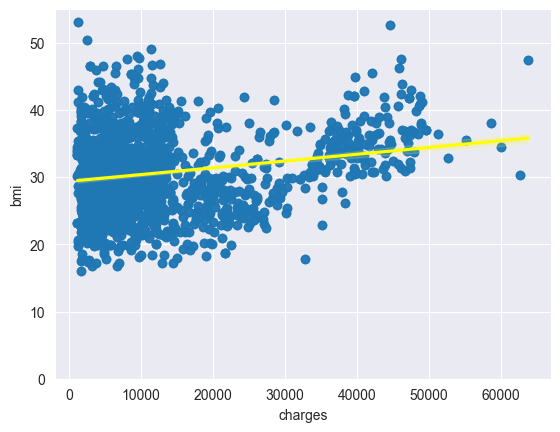

In [42]:
sns.regplot(x=df['charges'],y=df['bmi'],data=df,line_kws={'color':'yellow'})
plt.ylim(0,)

<Axes: xlabel='charges', ylabel='bmi'>

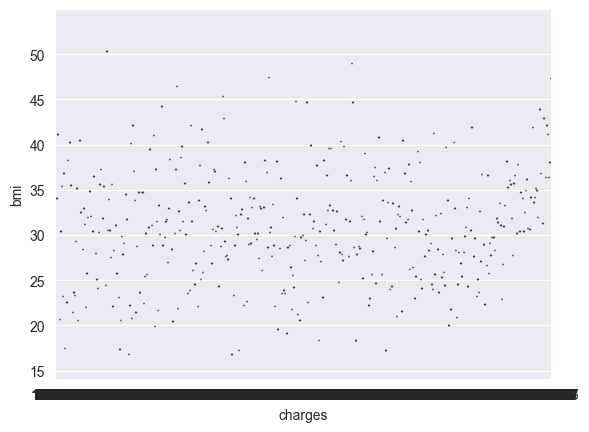

In [45]:
sns.boxplot(x='charges',y='bmi',data=df)

In [46]:
df.corr()

,age,gender,bmi,no_of_children,smoker,region,charges
age,1.000000,-0.015875,0.076344,-0.077067,-0.008019,0.008761,0.245121
gender,-0.015875,1.000000,0.042766,0.015693,0.083125,0.022360,0.062959
bmi,0.076344,0.042766,1.000000,-0.001642,0.011824,0.271200,0.199906
no_of_children,-0.077067,0.015693,-0.001642,1.000000,0.007016,-0.025594,0.066551
smoker,-0.008019,0.083125,0.011824,0.007016,1.000000,0.053839,0.789141
region,0.008761,0.022360,0.271200,-0.025594,0.053839,1.000000,0.054018
charges,0.245121,0.062959,0.199906,0.066551,0.789141,0.054018,1.000000


In [53]:
lr=LinearRegression()
lr.fit(df[['smoker']],df['charges'])
print(lr.intercept_)
print(lr.coef_)
print(lr.score(df[['smoker']],df['charges']))



8417.87439311597
[23832.50915928]
0.6227430402464125


In [58]:
y=df[['smoker','age','bmi','no_of_children','region']]
lr.fit(y,df['charges'])
print(lr.intercept_)
print(lr.coef_)
print(lr.score(y,df['charges']))


-11908.547945737175
[23871.67096497   228.40509469   361.62390187   791.65672471
  -409.63741611]
0.7232380380037843


In [61]:
from sklearn.metrics import r2_score
from sklearn.preprocessing  import StandardScaler,PolynomialFeatures
from sklearn.pipeline import Pipeline
inp=[('scale',StandardScaler()),('poly',PolynomialFeatures(include_bias=False)),('model',LinearRegression())]
pipe=Pipeline(inp)
y=y.astype(float)
pipe.fit(y,df['charges'])
ypipe=pipe.predict(y)
print(r2_score(df['charges'],ypipe))

0.816901307997979


In [62]:
z=df['charges']

In [65]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(y,z,test_size=0.2,random_state=1)
Ridge_model=Ridge(alpha=0.1)
Ridge_model.fit(x_train,y_train)
yhat=Ridge_model.predict(x_test)
print(r2_score(y_test,yhat))


0.6951352703962226


In [67]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train)
x_test_pr=pr.fit_transform(x_test)
Ridge_model.fit(x_train_pr,y_train)
y_hat=Ridge_model.predict(x_test_pr)
print(r2_score(y_test,y_hat))


0.7950472183475413
